In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import bipartite
import networkx as nx

# Utils

Generate one mode projection considering the weigths

In [10]:
from networkx.algorithms import bipartite
def sum_of_bipartite_edge_weights(graph, b1, b2):
    """
    Calculates the weight between two businesses (b1, b2) in the projected graph
    by summing the original 'weight' attributes of edges connecting their common users.

    The weight for each common user is the average of the 'weight' from user->b1 and user->b2.
    """
    projected_weight = 0
    common_users = set(graph.neighbors(b1)) & set(graph.neighbors(b2))

    if not common_users:
        return 0 # No shared users, no edge

    for user in common_users:
        # Get the weight from user to b1 and user to b2 from the original bipartite graph
        weight_b1 = graph[user][b1].get('weight', 0)
        weight_b2 = graph[user][b2].get('weight', 0)

        # Here you define how to combine the weights for each common user.
        # Examples:
        # 1. Sum of their individual weights for this user:
        #    projected_weight += weight_b1 + weight_b2
        # 2. Average of their individual weights for this user:
        #    projected_weight += (weight_b1 + weight_b2) / 2
        # 3. Product (if weights represent 'strength' that can multiply):
        #    projected_weight += weight_b1 * weight_b2
        # 4. Minimum (if you want the 'weakest link' of the shared connection):
        #    projected_weight += min(weight_b1, weight_b2)
        # 5. Maximum (if you want the 'strongest link'):
        #    projected_weight += max(weight_b1, weight_b2)
        # 6. For this example, let's stick with the "sum of averages" from previous:
        projected_weight += (weight_b1 + weight_b2) / 2

    return projected_weight

# Sample the 10k nodes

In [6]:
# Step 1: Load the edge list
file_path = './data/rec-yelp-user-business/rec-yelp-user-business.edges'
edges_df = pd.read_csv(file_path, sep='\s+', header=None, names=['user', 'business', 'weight'])
sampled_edges_df = edges_df.sample(n=10000, random_state=42)

# Step 2: Create a weighted bipartite graph
B = nx.Graph()

# Add edges with weight as attribute
for row in sampled_edges_df.itertuples(index=False):
    B.add_node(row.user, bipartite=0)       # Users
    B.add_node(row.business, bipartite=1)   # Businesses
    B.add_edge(row.user, row.business, weight=row.weight)

# Step 3: Get node sets
users = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
businesses = set(B) - users

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pedro\AppData\Local\Temp\ipykernel_11860\2400833213.py:3: SyntaxWarning: invalid escape sequence '\s'
  edges_df = pd.read_csv(file_path, sep='\s+', header=None, names=['user', 'business', 'weight'])


## Plot the bipartite visualiation

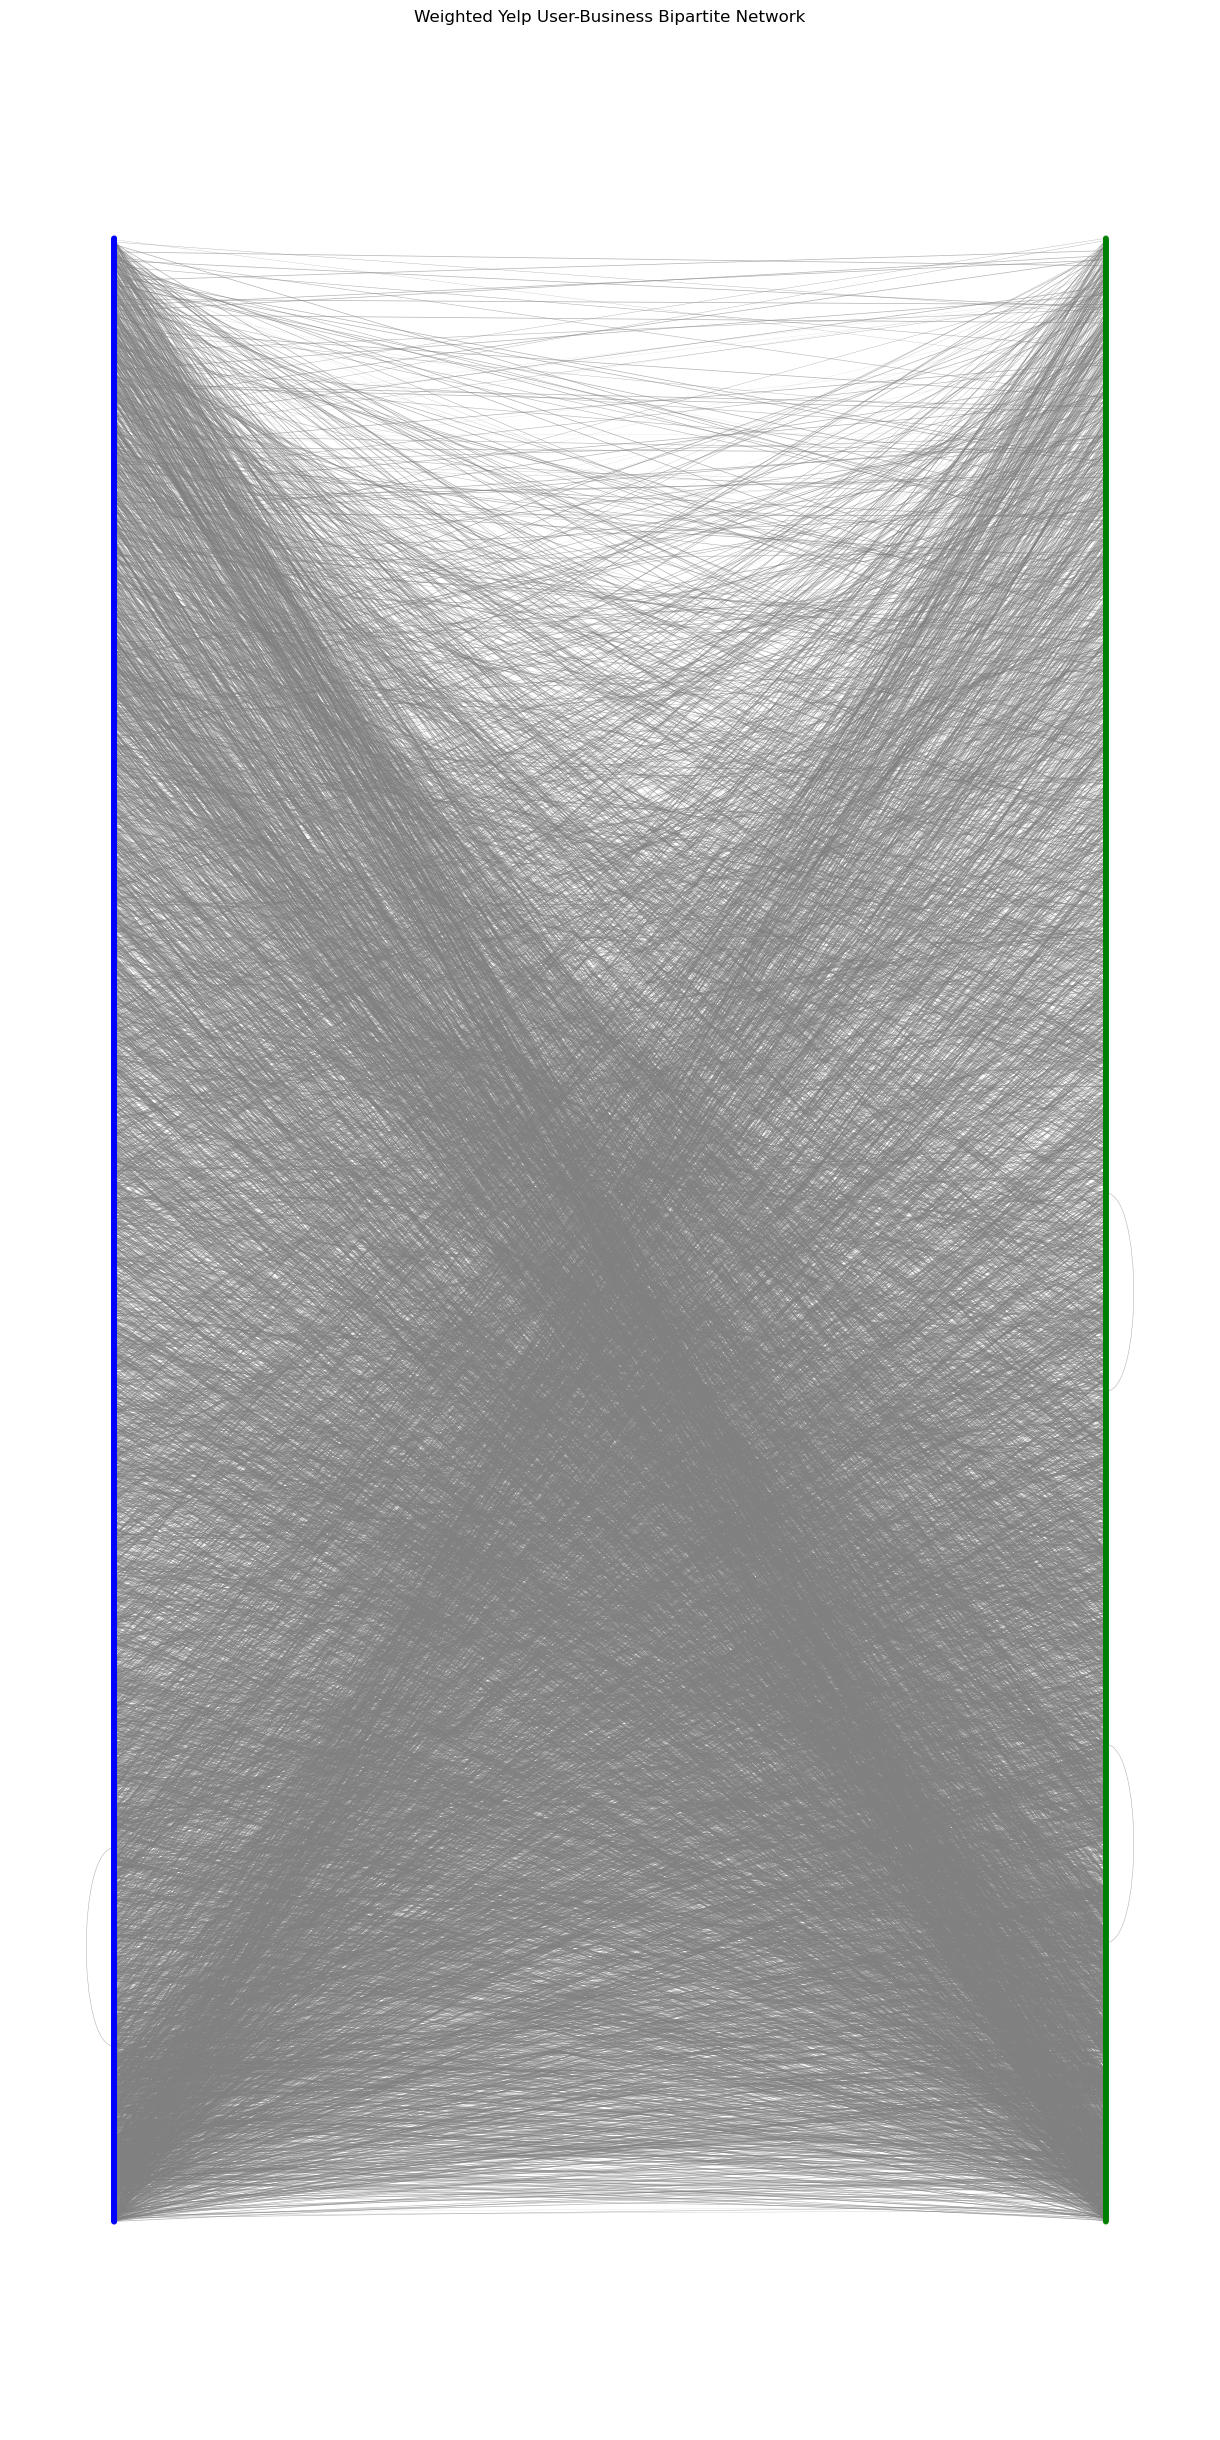

In [7]:
# Step 4: Draw the graph (optional: scale edge width by weight)
pos = nx.bipartite_layout(B, users)

# Edge weights for drawing
edge_weights = [d['weight'] for (_, _, d) in B.edges(data=True)]

plt.figure(figsize=(12, 24))
nx.draw(
    B, pos,
    with_labels=False,
    node_size=10,
    node_color=['blue' if node in users else 'green' for node in B.nodes()],
    width=[w * 0.1 for w in edge_weights],  # scale edge width
    edge_color='gray',
    alpha=0.6
)

plt.title("Weighted Yelp User-Business Bipartite Network")
plt.show()

One mode projection

In [8]:
# Get business nodes
business = {n for n, d in B.nodes(data=True) if d['bipartite'] == 1}

G_business_10k = bipartite.generic_weighted_projected_graph(
    B, businesses, weight_function=sum_of_bipartite_edge_weights
)
pos = nx.spring_layout(G_business_10k, seed=42, k=0.3)  # adjust k to increase/decrease spacing
print("\nProjected Business-Business Graph Edges with custom weights:")
for u, v, data in G_business_10k.edges(data=True):
    print(f"({u}, {v}, weight={data.get('weight', 'N/A')})")

# --- Step 4: Validate the weights (using the methods from the previous answer) ---
print("\n--- Validation of Projected Weights ---")
all_edge_attributes = nx.get_edge_attributes(G_business_10k, 'weight')
print(f"All projected edge weights: {all_edge_attributes}")


Projected Business-Business Graph Edges with custom weights:
(2, 8736, weight=3.0)
(2, 1861, weight=2.0)
(2, 4648, weight=3.0)
(2, 329, weight=2.5)
(2, 2667, weight=1.5)
(2, 1806, weight=2.5)
(2, 658, weight=3.0)
(2, 3926, weight=2.5)
(2, 2200, weight=3.5)
(2, 8153, weight=3.5)
(2, 1148, weight=2.5)
(2, 31039, weight=1.5)
(3, 10368, weight=5.0)
(3, 9222, weight=3.0)
(3, 193161, weight=5.0)
(3, 3083, weight=4.0)
(3, 1166, weight=4.5)
(3, 1424, weight=4.5)
(3, 1683, weight=4.5)
(3, 151, weight=4.5)
(3, 3223, weight=4.5)
(3, 8599, weight=3.0)
(3, 152, weight=4.5)
(3, 3361, weight=4.0)
(3, 53156, weight=4.5)
(3, 4004, weight=3.5)
(3, 53, weight=4.5)
(3, 182, weight=3.0)
(3, 568, weight=4.5)
(3, 184, weight=4.5)
(3, 47162, weight=4.5)
(3, 76093, weight=3.0)
(3, 1471, weight=4.5)
(3, 1089, weight=4.5)
(3, 1986, weight=4.0)
(3, 963, weight=3.0)
(3, 15180, weight=3.5)
(3, 205, weight=3.5)
(3, 3150, weight=4.5)
(3, 71509, weight=4.5)
(3, 13783, weight=3.5)
(3, 5592, weight=4.0)
(3, 10461, weig

In [60]:
len(G_business_10k)

7176

## Eport as csv

In [61]:
# Extract edges with weights
# edges_data = [
#     {"source": u, "target": v, "weight": d["weight"]}
#     for u, v, d in G_business_1k.edges(data=True)
# ]

# # Convert to DataFrame and export
# edges_df = pd.DataFrame(edges_data)
# edges_df.to_csv("business_business_edges_10k.csv", index=False)

## Plot Business-Business Visualiation One mode

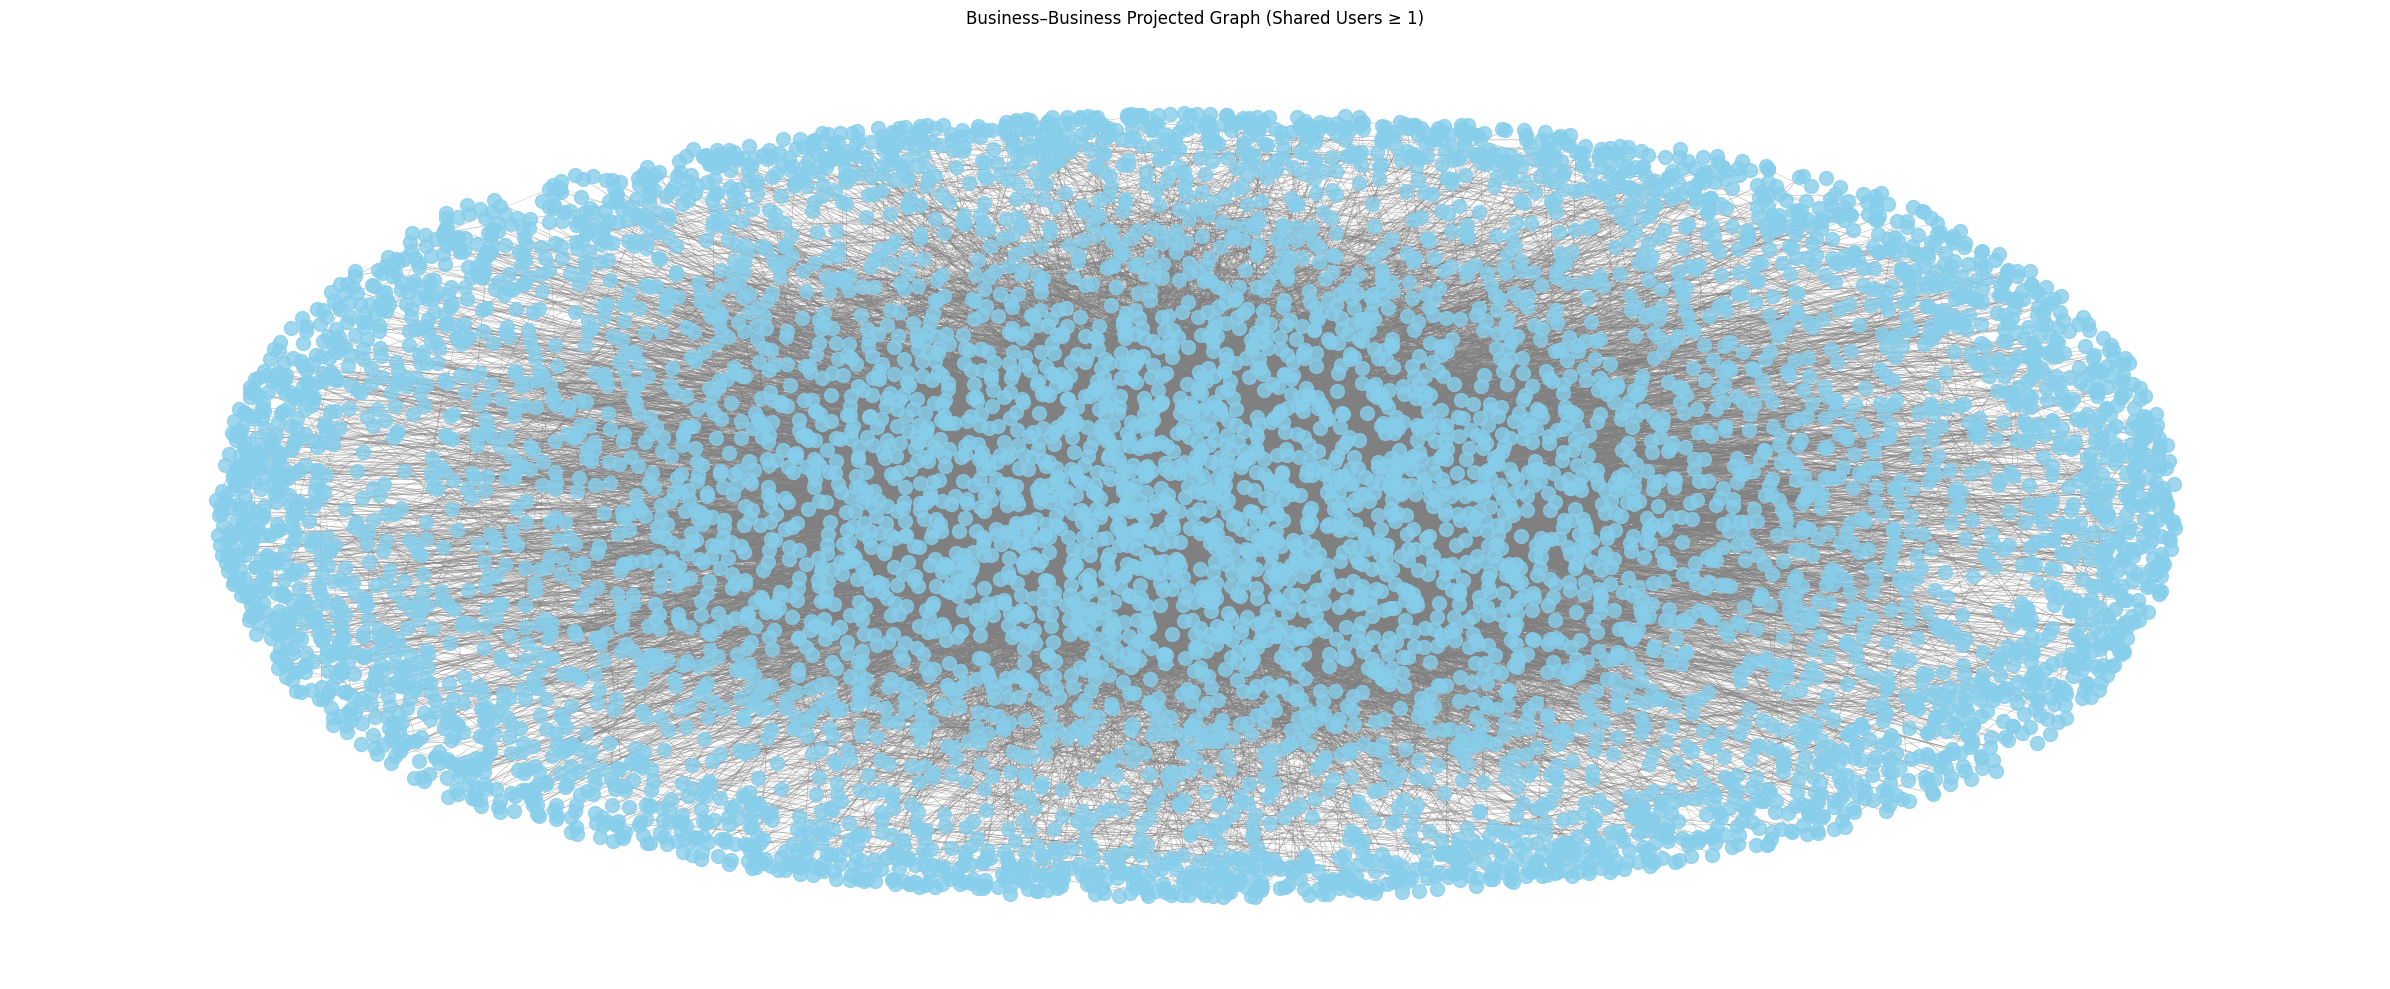

In [62]:
plt.figure(figsize=(24, 10))

# Optional: scale edge widths by weight
edge_weights = [d["weight"] for _, _, d in G_business_10k.edges(data=True)]

# Draw nodes
nx.draw_networkx_nodes(
    G_business_10k, pos,
    node_size=100,
    node_color="skyblue",
    alpha=0.8
)

# Draw edges
nx.draw_networkx_edges(
    G_business_10k, pos,
    width=[w * 0.1 for w in edge_weights],
    edge_color="gray",
    alpha=0.6
)

# Optional: add labels
# nx.draw_networkx_labels(G_business, pos, font_size=8)

plt.title("Business–Business Projected Graph (Shared Users ≥ 1)")
plt.axis("off")
plt.tight_layout()
plt.show()


# Sample 1k nodes

In [145]:
# Step 1: Load the edge list
file_path = './rec-yelp-user-business/rec-yelp-user-business.edges'
edges_df = pd.read_csv(file_path, sep='\s+', header=None, names=['user', 'business', 'weight'])
sampled_edges_df = edges_df.sample(n=3100, random_state=42)

B = nx.Graph()

# Add edges with weight as attribute
for row in sampled_edges_df.itertuples(index=False):
    B.add_node(row.user, bipartite=0)       # Users
    B.add_node(row.business, bipartite=1)   # Businesses
    B.add_edge(row.user, row.business, weight=row.weight)

# Step 3: Get node sets
users = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
businesses = set(B) - users

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davib\AppData\Local\Temp\ipykernel_20348\22046040.py:3: SyntaxWarning: invalid escape sequence '\s'
  edges_df = pd.read_csv(file_path, sep='\s+', header=None, names=['user', 'business', 'weight'])


In [146]:
print("Bipartite Graph Edges with 'weight' from your DataFrame:")
for u, v, data in B.edges(data=True):
    print(f"({u}, {v}, weight={data.get('weight', 'N/A')})")

Bipartite Graph Edges with 'weight' from your DataFrame:
(1034, 1122, weight=5)
(1034, 13375, weight=4)
(1034, 4329, weight=4)
(1034, 29968, weight=5)
(1034, 5019, weight=4)
(1034, 2246, weight=4)
(1122, 10685, weight=2)
(4132, 2984, weight=4)
(4132, 1220, weight=5)
(1569, 2126, weight=3)
(1569, 1276, weight=4)
(1569, 346, weight=4)
(1569, 24702, weight=4)
(1569, 2505, weight=5)
(2126, 177684, weight=5)
(2126, 4494, weight=5)
(3150, 6690, weight=4)
(42262, 7743, weight=3)
(7743, 61492, weight=4)
(7743, 11583, weight=5)
(7743, 1113, weight=5)
(8564, 166, weight=5)
(166, 11066, weight=2)
(166, 67617, weight=5)
(166, 104835, weight=3)
(166, 8394, weight=4)
(166, 9082, weight=2)
(166, 90993, weight=4)
(166, 59373, weight=4)
(166, 2195, weight=3)
(166, 26870, weight=4)
(21987, 340, weight=5)
(340, 36836, weight=3)
(340, 6280, weight=4)
(340, 303, weight=4)
(24367, 3566, weight=5)
(568, 505, weight=4)
(568, 184, weight=5)
(568, 1981, weight=4)
(568, 4429, weight=3)
(568, 8901, weight=3)
(568

In [147]:
len(B)

4199

## Business
One mode projection

In [158]:
G_business_1k = bipartite.generic_weighted_projected_graph(
    B, businesses, weight_function=sum_of_bipartite_edge_weights
)

print("\nProjected Business-Business Graph Edges with custom weights:")
for u, v, data in G_business_1k.edges(data=True):
    print(f"({u}, {v}, weight={data.get('weight', 'N/A')})")

# --- Step 4: Validate the weights (using the methods from the previous answer) ---
print("\n--- Validation of Projected Weights ---")
all_edge_attributes = nx.get_edge_attributes(G_business_1k, 'weight')
print(f"All projected edge weights: {all_edge_attributes}")


Projected Business-Business Graph Edges with custom weights:
(4, 3360, weight=2.5)
(4, 25906, weight=3.5)
(4, 2363, weight=4.0)
(6, 6944, weight=5.0)
(6, 1507, weight=5.0)
(6, 1573, weight=3.5)
(6, 10250, weight=5.0)
(6, 979, weight=3.5)
(7, 15910, weight=5.0)
(8, 4257, weight=3.5)
(8, 9640, weight=4.0)
(8, 346, weight=3.5)
(8, 6550, weight=3.5)
(8, 5338, weight=4.0)
(10, 2463, weight=4.5)
(10, 50, weight=3.0)
(10, 2015, weight=3.5)
(15, 2234, weight=3.5)
(15, 2124, weight=3.0)
(17, 302, weight=4.0)
(22, 1763, weight=4.5)
(22, 56675, weight=5.0)
(22, 869, weight=4.0)
(22, 201, weight=4.0)
(22, 117035, weight=4.5)
(21, 8576, weight=1.5)
(21, 2512, weight=2.0)
(21, 1969, weight=2.5)
(21, 3729, weight=2.0)
(21, 247, weight=3.5)
(21, 7035, weight=3.5)
(26, 206597, weight=3.0)
(26, 1351, weight=3.5)
(26, 133609, weight=4.5)
(26, 6730, weight=4.5)
(26, 1867, weight=5.0)
(26, 568, weight=4.0)
(26, 70669, weight=5.0)
(26, 12909, weight=3.5)
(26, 4495, weight=2.0)
(26, 1103, weight=4.0)
(26, 6

Sample Largest Connected Componnent

In [159]:
def largest_component(G):
    components = nx.connected_components(G)
    largest = max(components, key=len)
    return G.subgraph(largest).copy()

G_business_1k = largest_component(G_business_1k)

In [160]:
len(G_business_1k)

112

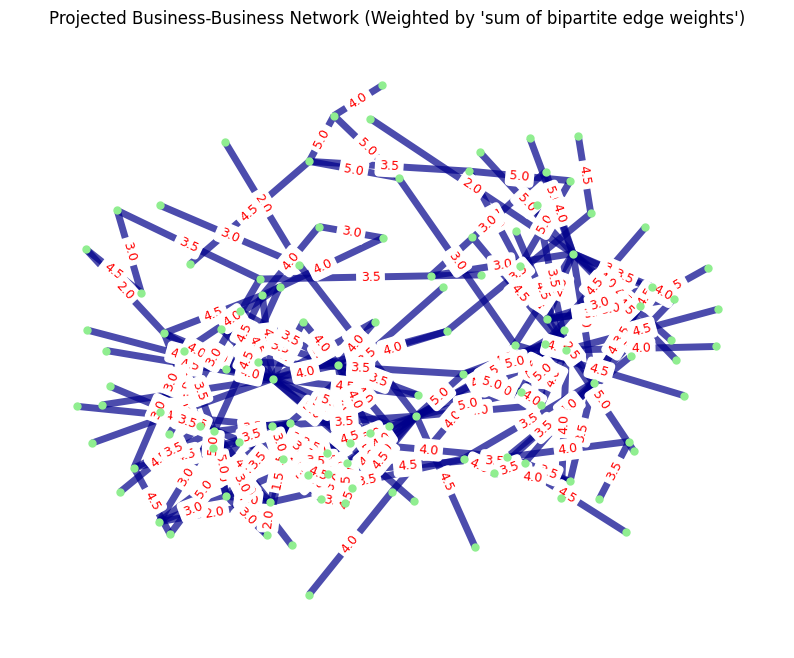

In [161]:
# Plotting (optional, but good for visual validation)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_business_1k, k=0.7, iterations=50)

nx.draw_networkx_nodes(G_business_1k, pos, node_color='lightgreen', node_size=25)

weights = [G_business_1k[u][v].get('weight', 0) for u, v in G_business_1k.edges()]
if weights:
    max_weight = max(weights)
    edge_widths = [max_weight for w in weights] # Scale width for better visibility
else:
    edge_widths = []

nx.draw_networkx_edges(G_business_1k, pos, width=edge_widths, edge_color='darkblue', alpha=0.7)
# nx.draw_networkx_labels(G_business_1k, pos)

edge_labels = nx.get_edge_attributes(G_business_1k, 'weight')
rounded_edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G_business_1k, pos, edge_labels=rounded_edge_labels, font_size=9, font_color='red')

plt.title("Projected Business-Business Network (Weighted by 'sum of bipartite edge weights')")
plt.axis('off')
plt.show()

In [162]:
for u, v, data in G_business_1k.edges(data=True):
    print(f"{u} ↔ {v} | weight = {data.get('weight', 1)}")

1540 ↔ 575 | weight = 4.0
1540 ↔ 1112 | weight = 3.5
1540 ↔ 6225 | weight = 3.5
1540 ↔ 39785 | weight = 4.0
7693 ↔ 4113 | weight = 2.0
70669 ↔ 26 | weight = 5.0
8208 ↔ 283 | weight = 5.0
8208 ↔ 1574 | weight = 5.0
1041 ↔ 463 | weight = 4.0
1041 ↔ 30592 | weight = 5.0
1041 ↔ 3201 | weight = 4.0
1041 ↔ 21442 | weight = 5.0
1041 ↔ 126086 | weight = 5.0
1041 ↔ 71 | weight = 5.0
1041 ↔ 8016 | weight = 5.0
1041 ↔ 2255 | weight = 4.5
1041 ↔ 140627 | weight = 4.5
1041 ↔ 94933 | weight = 4.0
1041 ↔ 29853 | weight = 3.5
1041 ↔ 2589 | weight = 4.5
1041 ↔ 2528 | weight = 4.0
1041 ↔ 21349 | weight = 4.5
1041 ↔ 23976 | weight = 5.0
1041 ↔ 53675 | weight = 4.5
1041 ↔ 1710 | weight = 4.0
1041 ↔ 218938 | weight = 4.5
7696 ↔ 665 | weight = 4.0
82449 ↔ 96 | weight = 4.0
4113 ↔ 1303 | weight = 4.5
4113 ↔ 454 | weight = 3.0
26 ↔ 206597 | weight = 3.0
26 ↔ 1351 | weight = 3.5
26 ↔ 133609 | weight = 4.5
26 ↔ 6730 | weight = 4.5
26 ↔ 1867 | weight = 5.0
26 ↔ 568 | weight = 4.0
26 ↔ 12909 | weight = 3.5
26 ↔ 4

### Community discovery

In [180]:
import community  # this is the python-louvain package

# Run Louvain algorithm
partition = community.best_partition(G_business_1k, weight='None', resolution=2)

# Add as node attributes
nx.set_node_attributes(G_business_1k, partition, 'community')

In [181]:

# The 'partition' is a dictionary where keys are node IDs and values are community IDs (integers)
print("Detected communities for some nodes:")
for node, comm_id in list(partition.items())[:10]: # Print first 10 for example
    print(f"Node {node}: Community {comm_id}")

# Get the number of communities
num_communities = max(partition.values()) + 1 if partition else 0
print(f"\nNumber of communities detected: {num_communities}")

# Get modularity score (how well the graph is partitioned into communities)
modularity = community.modularity(partition, G_business_1k, weight='None')
print(f"Modularity score: {modularity:.3f}")

Detected communities for some nodes:
Node 1540: Community 0
Node 7693: Community 1
Node 70669: Community 2
Node 8208: Community 3
Node 1041: Community 4
Node 7696: Community 5
Node 82449: Community 6
Node 4113: Community 1
Node 26: Community 2
Node 2589: Community 4

Number of communities detected: 12
Modularity score: 0.759


In [177]:
sorted_communities = sorted(partition.items(), key=len, reverse=True)
top_n_com = sorted_communities[:10]

for i, community in enumerate(top_n_com):
    print(f"Community {i+1}: sie = {len(community)}")

Community 1: sie = 2
Community 2: sie = 2
Community 3: sie = 2
Community 4: sie = 2
Community 5: sie = 2
Community 6: sie = 2
Community 7: sie = 2
Community 8: sie = 2
Community 9: sie = 2
Community 10: sie = 2


In [166]:
partition.values()

dict_values([12, 1, 2, 3, 4, 5, 6, 1, 2, 4, 10, 3, 8, 9, 6, 2, 6, 11, 12, 4, 2, 9, 12, 12, 0, 2, 3, 12, 6, 12, 7, 6, 6, 9, 9, 5, 7, 4, 0, 9, 12, 0, 5, 9, 6, 4, 6, 5, 4, 0, 0, 11, 0, 7, 4, 6, 10, 0, 6, 7, 2, 9, 3, 6, 0, 3, 0, 10, 3, 3, 4, 12, 2, 4, 4, 0, 4, 12, 9, 7, 6, 3, 0, 5, 7, 2, 4, 10, 9, 2, 12, 4, 0, 4, 10, 7, 11, 4, 2, 1, 6, 5, 7, 10, 8, 0, 4, 2, 9, 9, 0, 2])

C:\Users\davib\AppData\Local\Temp\ipykernel_20348\2809594759.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


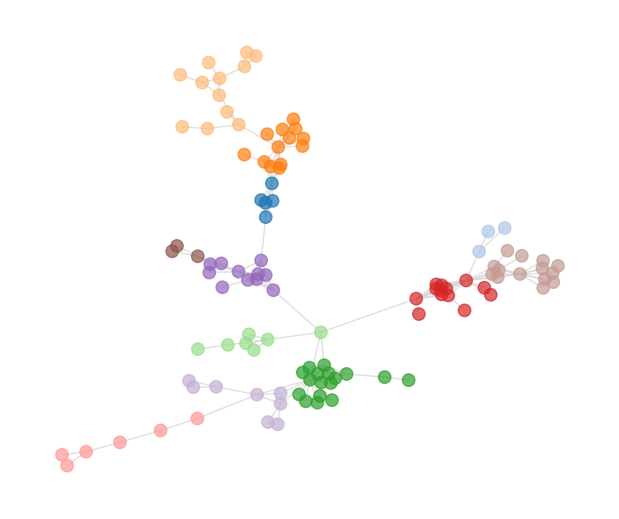

In [191]:
import matplotlib.pyplot as plt

# Assign colors based on community
unique_comms = set(partition.values())
color_map = {c: plt.cm.tab20(i % 20) for i, c in enumerate(unique_comms)}
node_colors = [color_map[partition[n]] for n in G_business_1k.nodes()]

# Use spring layout
pos = nx.spring_layout(G_business_1k, k=0.1)
plt.figure(figsize=(6, 5))

nx.draw(
    G_business_1k, pos,
    node_color=node_colors,
    node_size=80,
    edge_color='lightgray',
    with_labels=False,
    alpha=0.7,
)


# Extract weights
# edge_labels = nx.get_edge_attributes(G_business_1k)

# Draw edge labels (weights)
# nx.draw_networkx_edge_labels(G_business_1k, pos)
# plt.title("Business–Business Network with Louvain Communities")
plt.axis("off")
plt.tight_layout()
plt.show()


## Users

In [201]:
G_users = bipartite.generic_weighted_projected_graph(
    B, users, weight_function=sum_of_bipartite_edge_weights
)

print("\nProjected Business-Business Graph Edges with custom weights:")
for u, v, data in G_users.edges(data=True):
    print(f"({u}, {v}, weight={data.get('weight', 'N/A')})")

# --- Step 4: Validate the weights (using the methods from the previous answer) ---
print("\n--- Validation of Projected Weights ---")
all_edge_attributes = nx.get_edge_attributes(G_users, 'weight')
print(f"All projected edge weights: {all_edge_attributes}")


Projected Business-Business Graph Edges with custom weights:
(106501, 17812, weight=4.5)
(8201, 1680, weight=3.5)
(11, 9216, weight=4.0)
(11, 676, weight=4.0)
(11, 45832, weight=4.0)
(11, 33323, weight=4.0)
(11, 38327, weight=4.5)
(12, 5834, weight=3.5)
(12, 34101, weight=4.0)
(13, 189, weight=4.5)
(13, 55567, weight=4.5)
(8208, 283, weight=5.0)
(8208, 1574, weight=5.0)
(19, 7287, weight=4.5)
(20, 769, weight=3.0)
(20, 3459, weight=4.0)
(20, 102, weight=4.0)
(20, 15590, weight=4.5)
(20, 6663, weight=4.0)
(20, 3569, weight=4.5)
(20, 19473, weight=4.0)
(20, 97235, weight=4.5)
(20, 565, weight=4.0)
(8217, 49037, weight=3.5)
(28, 1148, weight=4.5)
(32, 14034, weight=4.0)
(33, 226548, weight=4.5)
(49187, 35958, weight=3.5)
(16421, 41890, weight=5.0)
(16421, 4898, weight=5.0)
(16421, 1991, weight=5.0)
(16421, 19623, weight=5.0)
(16421, 6218, weight=4.5)
(16421, 397, weight=4.5)
(16421, 526, weight=4.5)
(16421, 105018, weight=5.0)
(16421, 7125, weight=4.5)
(16421, 166332, weight=5.0)
(16421,

In [202]:
def largest_component(G):
    components = nx.connected_components(G)
    largest = max(components, key=len)
    return G.subgraph(largest).copy()

G_users = largest_component(G_users)

In [203]:
len(G_users)

150

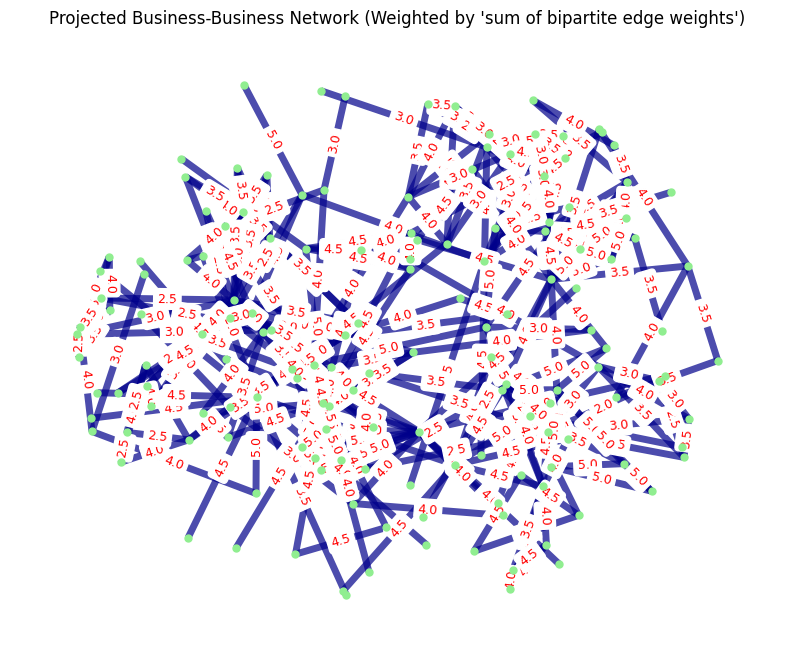

In [ ]:
# Plotting (optional, but good for visual validation)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_users, k=0.7, iterations=50)

nx.draw_networkx_nodes(G_users, pos, node_color='lightgreen', node_size=25)

weights = [G_users[u][v].get('weight', 0) for u, v in G_users.edges()]
if weights:
    max_weight = max(weights)
    edge_widths = [max_weight for w in weights] # Scale width for better visibility
else:
    edge_widths = []

nx.draw_networkx_edges(G_users, pos, width=edge_widths, edge_color='darkblue', alpha=0.7)
# nx.draw_networkx_labels(G_users, pos)

edge_labels = nx.get_edge_attributes(G_users, 'weight')
rounded_edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G_users, pos, edge_labels=rounded_edge_labels, font_size=9, font_color='red')

plt.title("Projected User-User Network (Weighted by 'sum of bipartite edge weights')")
plt.axis('off')
plt.show()

### Community discovery

In [206]:
import community  # this is the python-louvain package

# Run Louvain algorithm
partition = community.best_partition(G_users, weight='None', resolution=2)

# Add as node attributes
nx.set_node_attributes(G_users, partition, 'community')

In [207]:

# The 'partition' is a dictionary where keys are node IDs and values are community IDs (integers)
print("Detected communities for some nodes:")
for node, comm_id in list(partition.items())[:10]: # Print first 10 for example
    print(f"Node {node}: Community {comm_id}")

# Get the number of communities
num_communities = max(partition.values()) + 1 if partition else 0
print(f"\nNumber of communities detected: {num_communities}")

# Get modularity score (how well the graph is partitioned into communities)
modularity = community.modularity(partition, G_users, weight='None')
print(f"Modularity score: {modularity:.3f}")

Detected communities for some nodes:
Node 516: Community 0
Node 6662: Community 10
Node 27658: Community 2
Node 2064: Community 1
Node 1557: Community 4
Node 7189: Community 5
Node 78873: Community 10
Node 30749: Community 9
Node 1056: Community 6
Node 16930: Community 4

Number of communities detected: 14
Modularity score: 0.833


In [208]:
sorted_communities = sorted(partition.items(), key=len, reverse=True)
top_n_com = sorted_communities[:10]

for i, community in enumerate(top_n_com):
    print(f"Community {i+1}: sie = {len(community)}")

Community 1: sie = 2
Community 2: sie = 2
Community 3: sie = 2
Community 4: sie = 2
Community 5: sie = 2
Community 6: sie = 2
Community 7: sie = 2
Community 8: sie = 2
Community 9: sie = 2
Community 10: sie = 2


C:\Users\davib\AppData\Local\Temp\ipykernel_20348\1770967341.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


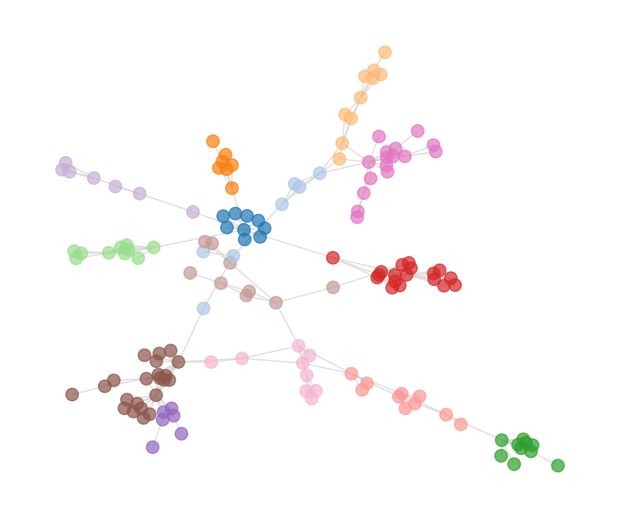

In [217]:
import matplotlib.pyplot as plt

# Assign colors based on community
unique_comms = set(partition.values())
color_map = {c: plt.cm.tab20(i % 20) for i, c in enumerate(unique_comms)}
node_colors = [color_map[partition[n]] for n in G_users.nodes()]

# Use spring layout
pos = nx.spring_layout(G_users, k=0.1)
plt.figure(figsize=(6, 5))

nx.draw(
    G_users, pos,
    node_color=node_colors,
    node_size=80,
    edge_color='lightgray',
    with_labels=False,
    alpha=0.7,
)


# Extract weights
# edge_labels = nx.get_edge_attributes(G_business_1k)

# Draw edge labels (weights)
# nx.draw_networkx_edge_labels(G_business_1k, pos)
# plt.title("Business–Business Network with Louvain Communities")
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
#### Users Projection network

G_Users_Sample

G_Users_Sample_LCC

#### Business Projection network






